## Tarea 11 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 8 de diciembre
* Cuaderno ajustado del trabajo de Guillaume Lemaltre, Andreas Mueller.

Muchos casos de aprendizaje no supervisado, como la reducción de la dimensionalidad, manifold learning y la extracción de características, encuentran una nueva representación de los datos de entrada sin ninguna entrada adicional. (En contraste con el aprendizaje supervisado, los algoritmos no supervisados no requieren ni consideran variables objetivo como en los ejemplos de clasificación y regresión).

Un ejemplo muy básico es el reescalado de nuestros datos, que es un requisito para muchos algoritmos de machine learning, ya que no son invariantes en escala: el reescalado cae en la categoría de preprocesamiento de datos y apenas puede llamarse `learning`. 

Existen muchas técnicas diferentes de reescalado, y en el siguiente ejemplo, veremos un método en particular que comúnmente se llama "estandarización". Aquí, reescalamos los datos para que cada característica se centre en cero (`media = 0`) con varianza unitaria.

Por ejemplo, si tenemos un conjunto de datos 1D con los valores `[1, 2, 3, 4, 5]`, los valores estandarizados son:

```
 1 -> -1.41
 2 -> -0.71
 3 -> 0.0
 4 -> 0.71
 5 -> 1.41
```

calculados por la ecuación $x_{\text{estandarizado}} = \frac{x - \mu_{x}}{\sigma_x}$ donde $\mu$ es la media muestral y $\sigma$ la desviación estándar.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ary = np.array([1, 2, 3, 4, 5])
ary_estandarizado = (ary - ary.mean()) / ary.std()
ary_estandarizado

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Aunque la estandarización es el procedimiento de preprocesamiento más básico, scikit-learn implementa una clase `StandardScaler` para este cálculo.

La aplicación de dicho preprocesamiento tiene una interfaz muy similar a los algoritmos de aprendizaje supervisados. Para obtener más práctica con la interfaz `Transformer` de scikit-learn, comencemos con utilizar el conjunto de datos `iris` y  reescalarlo:

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(iris.data, iris.target, random_state=0)
print(X_entrenamiento.shape)

(112, 4)


El conjunto de datos del iris no está "centrado", es decir, tiene una media distinta de cero y una desviación estándar que es diferente para cada componente:

In [3]:
print("media : %s " % X_entrenamiento.mean(axis=0))
print("desviacion estandar : %s " % X_entrenamiento.std(axis=0))

media : [5.88660714 3.05178571 3.79642857 1.22321429] 
desviacion estandar : [0.86741565 0.43424445 1.79264014 0.77793019] 


In [4]:
from sklearn.preprocessing import StandardScaler
escaler = StandardScaler()

Al igual que con los algoritmos de clasificación y regresión, llamamos `fit` para aprender el modelo a partir de los datos. Como este es un modelo sin supervisión, solo pasamos `X`, no `y`. Esto simplemente estima la media y la desviación estándar.

In [5]:
escaler.fit(X_entrenamiento)

StandardScaler(copy=True, with_mean=True, with_std=True)

Ahora reescalamos los datos aplicando el método `transform` no `predict` en esta situación.

In [6]:
X_entrenamiento_escalado = escaler.transform(X_entrenamiento)

`X_train_scaled` tiene el mismo número de muestras y características, pero la media se restó y todas las características se escalaron para tener una desviación estándar unitaria:

In [7]:
print(X_entrenamiento_escalado.shape)

(112, 4)


In [8]:
print("media : %s " % X_entrenamiento_escalado.mean(axis=0))
print("desviacion estandar : %s " % X_entrenamiento_escalado.std(axis=0))


media : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16] 
desviacion estandar : [1. 1. 1. 1.] 


Para resumir: a través del método `fit`, el estimador se ajusta a los datos que proporcionamos. En este paso, el estimador estima los parámetros a partir de los datos (aquí: media y desviación estándar). Luego, si usamos `transform` en los datos, estos parámetros se utilizan para transformar un conjunto de datos. (Ten en cuenta que el método `transform` no actualiza estos parámetros).

Es importante tener en cuenta que la misma transformación se aplica al entrenamiento y al conjunto de pruebas. Eso tiene la consecuencia de que la media de los datos de prueba no es cero después de escalar:

In [9]:
X_prueba_escalado = escaler.transform(X_prueba)
print("media de datos de prueba: %s" % X_prueba_escalado.mean(axis=0))

media de datos de prueba: [-0.19692712  0.05042896 -0.08461917 -0.12117658]


Es importante que los datos de entrenamiento y prueba se transformen exactamente de la misma manera, para que los siguientes pasos de procesamiento tengan sentido en los datos.

Hay varias formas comunes de escalar los datos. La técnica común es el `StandardScaler` que acabamos de presentar, pero redimensionando los datos a un mínimo fijo con un valor máximo con `MinMaxScaler` (generalmente entre `0` y `1`), o usando estadísticas más robustas como la mediana y el cuantil, en lugar de la media y la desviación estándar (con `RobustScaler`), también son útiles.

### PCA

Una transformación no supervisada que es algo más interesante es PCA. Es una técnica para reducir la dimensionalidad de los datos, creando una proyección lineal. Es decir, encontramos nuevas características para representar los datos que son una combinación lineal de los datos antiguos (es decir, lo rotamos). Por lo tanto, podemos pensar en PCA como una proyección de nuestros datos en un nuevo espacio de características.

La forma en que PCA encuentra estas nuevas direcciones es buscando las direcciones de varianza máxima. Por lo general, solo se conservan algunos componentes que explican la mayor parte de la varianza en los datos. Aquí, la premisa es reducir el tamaño (dimensionalidad) de un conjunto de datos mientras se captura la mayor parte de su información. Hay muchas razones por las que la reducción de la dimensionalidad puede ser útil: puede reducir el costo computacional al ejecutar algoritmos de aprendizaje, disminuir el espacio de almacenamiento y puede ayudar con la llamada `maldición de la dimensionalidad`.


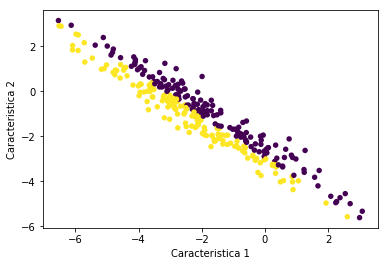

In [10]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2");

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

Luego ajustamos el modelo PCA con nuestros datos. Como PCA es un algoritmo no supervisado, no hay salida `y`.

In [12]:
pca.fit(X_blob)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Luego podemos transformar los datos, proyectados en los componentes principales:

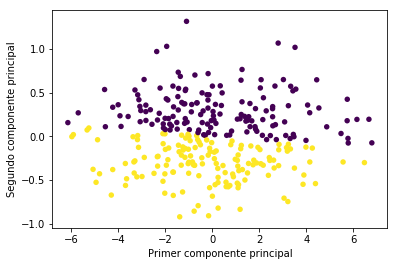

In [13]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal");

In [14]:
pca = PCA(n_components=1).fit(X_blob)

In [15]:
X_blob.shape


(300, 2)

In [16]:
pca.transform(X_blob).shape

(300, 1)

1. Visualice el conjunto de datos del iris con los dos primeros componentes principales y compare esta visualización con dos de las características originales.


In [17]:
# Tu solucion